In [1]:
from cem import CEM
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import random

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
#from causalml.inference.meta import CausalForest
from causalinference import CausalModel

import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties  # 导入FontProperties
import warnings
import statsmodels.api as sm

warnings.filterwarnings("ignore")

In [2]:
path1 = r'E:\netData\APS\1 Authors\APS_authors2.0.zip'

df = pd.read_csv(path1)

df['type'] = df['type'].map(dict(zip(['获奖学者' , '非获奖学者'] , ['laureate' , 'non-laureate'])))

In [3]:
df['treatment'] = df['type'].map(dict(zip(['laureate' , 'non-laureate'] , [1 , 0])))
df['I C'] = df['C'] - df['E C']

In [27]:
data = df[['pub_num','C','h','E C','E h','I C','type']].copy()

In [28]:
d1 = data[data['type'] == 'laureate'].copy()
d2 = data[data['type'] == 'non-laureate'].copy()
d1.index = range(len(d1))
d2.index = range(len(d2))

# Control C

In [92]:
lst = []
for n in d1['C'].values:
    if n > 500:
        for mm in range(n, 500, -1):
            if mm in d2['C'].values:
                n = mm
                break
    else:
        for mm in range(n, 1500):
            if mm in d2['C'].values:
                n = mm
                break
    x = d2[d2['C']==n].sample(n=1).index[0]
    lst.append(x)

In [93]:
d3 = d2.iloc[lst , :].copy()
d3 = d3.copy()
d3['type'] = 'control C'
dd = pd.concat([d1,d3])

In [94]:
def draw_bar(dd , va ,label, savepath):
    f, ax = plt.subplots(figsize=(7, 7))
    
    sns.set_theme(style="ticks")
    sns.barplot(data=dd, x="type", y=va , errwidth=3, capsize=.2,palette=['#943126','#1E8449'])
    if m==1:
        plt.ylim(0,50)
    else:
        ax.set_yscale("log")
        plt.ylim(10e0,10e4)
    
    plt.xticks(size = 30)
    plt.yticks(size = 30)
    plt.xlabel(label,fontsize = 30)
    plt.ylabel('',fontsize = 0)
    plt.savefig(r"F:\A J YANG PAPER\APS analysis\Sciento EC Eh\fig\fig B3\{}.pdf".format(savepath),bbox_inches = 'tight')

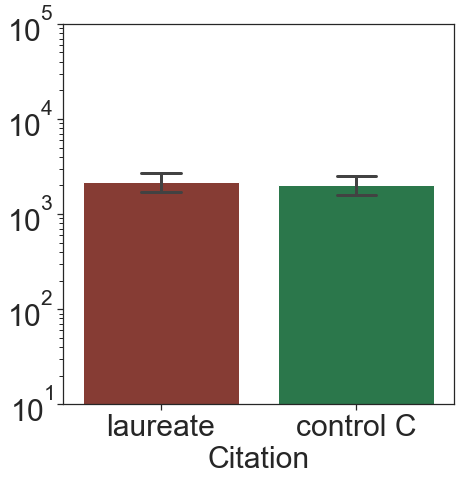

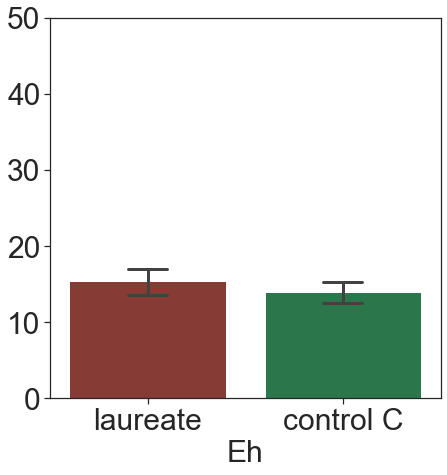

In [95]:
labels = ['Citation','Eh']
savepath = ['C','Eh']
valst = [ 'C','E h']
for m in range(len(valst)):
    draw_bar(dd ,valst[m], labels[m] , savepath[m])

In [96]:
[scipy.stats.ttest_ind(d1[m].values , d3[m].values,equal_var=False,alternative='two-sided') for m in valst]

[Ttest_indResult(statistic=0.3730219686434694, pvalue=0.709447244620091),
 Ttest_indResult(statistic=1.2696539294497196, pvalue=0.20538916317794542)]

In [97]:
dd[dd['type']=='laureate'].describe()

,pub_num,C,h,E C,E h,I C
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,52.446154,2151.076923,18.353846,1859.907692,15.353846,291.169231
std,48.507661,2963.569897,11.925389,2599.959593,9.977386,496.510648
min,5.000000,102.000000,3.000000,85.000000,2.000000,0.000000
25%,20.000000,316.750000,9.000000,262.750000,8.000000,47.000000
50%,42.000000,1162.500000,17.000000,948.000000,13.000000,141.500000
75%,63.000000,2416.750000,24.000000,2261.750000,19.750000,283.750000
max,307.000000,15906.000000,58.000000,14967.000000,52.000000,3031.000000


In [98]:
dd[dd['type']=='control C'].describe()

,pub_num,C,h,E C,E h,I C
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,90.138462,2024.323077,18.907692,1432.284615,13.907692,592.038462
std,99.655434,2495.558266,12.314009,1647.384487,8.313104,926.018638
min,1.000000,102.000000,1.000000,77.000000,1.000000,2.000000
25%,22.250000,316.750000,9.000000,249.500000,6.250000,64.500000
50%,54.000000,1162.500000,17.000000,884.500000,12.000000,237.000000
75%,120.750000,2406.250000,24.000000,1765.000000,17.750000,638.000000
max,491.000000,10494.000000,53.000000,6602.000000,34.000000,4106.000000


# control h

In [65]:
lst = []
for n in d1['h'].values:
    if n > 20:
        for mm in range(n, 20, -1):
            if mm in d2['h'].values:
                n = mm
                break
    else:
        for mm in range(n, 1500):
            if mm in d2['h'].values:
                n = mm
                break
    x = d2[d2['h']==n].sample(n=1).index[0]
    lst.append(x)

In [66]:
d3 = d2.iloc[lst , :].copy()
d3 = d3.copy()
d3['type'] = 'control h'
dd = pd.concat([d1,d3])

In [90]:
def draw_bar(dd , va ,label, savepath):
    f, ax = plt.subplots(figsize=(7, 7))
    
    sns.set_theme(style="ticks")
    sns.barplot(data=dd, x="type", y=va , errwidth=3, capsize=.2,palette=['#943126','#1E8449'])
    

    plt.ylim(0,50)
    
    plt.xticks(size = 30)
    plt.yticks(size = 30)
    plt.xlabel(label,fontsize = 30)
    plt.ylabel('',fontsize = 0)
    plt.savefig(r"F:\A J YANG PAPER\APS analysis\Sciento EC Eh\fig\fig B3\{}.pdf".format(savepath),bbox_inches = 'tight')

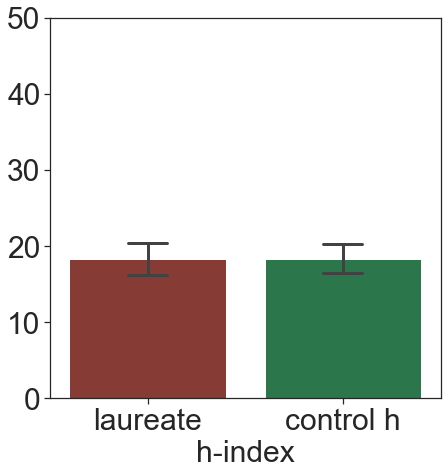

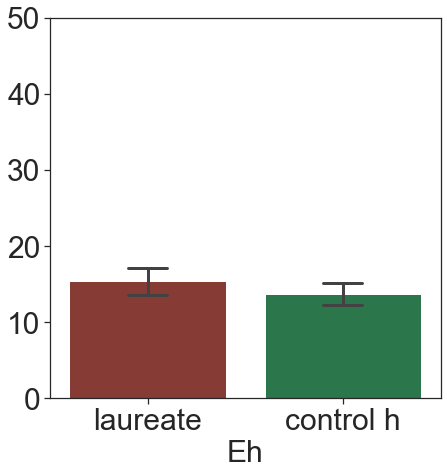

In [91]:
labels = ['h-index','Eh']
savepath = ['2h','2Eh']
valst = [ 'h',  'E h']
for m in range(len(valst)):
    draw_bar(dd ,valst[m], labels[m] , savepath[m])

In [87]:
[scipy.stats.ttest_ind(d1[m].values , d3[m].values,equal_var=False,alternative='two-sided') for m in valst]

[Ttest_indResult(statistic=0.07384565529846643, pvalue=0.9411904661719078),
 Ttest_indResult(statistic=1.4675575988112135, pvalue=0.14348352510076176)]

In [88]:
dd[dd['type']=='laureate'].describe()

,pub_num,C,h,E C,E h,I C
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,52.446154,2151.076923,18.353846,1859.907692,15.353846,291.169231
std,48.507661,2963.569897,11.925389,2599.959593,9.977386,496.510648
min,5.000000,102.000000,3.000000,85.000000,2.000000,0.000000
25%,20.000000,316.750000,9.000000,262.750000,8.000000,47.000000
50%,42.000000,1162.500000,17.000000,948.000000,13.000000,141.500000
75%,63.000000,2416.750000,24.000000,2261.750000,19.750000,283.750000
max,307.000000,15906.000000,58.000000,14967.000000,52.000000,3031.000000


In [89]:
dd[dd['type']=='control h'].describe()

,pub_num,C,h,E C,E h,I C
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,75.453846,1753.884615,18.246154,1268.984615,13.684615,484.900000
std,84.172959,2417.569680,11.587257,1671.876317,8.284696,829.253011
min,3.000000,36.000000,3.000000,19.000000,2.000000,6.000000
25%,24.250000,283.000000,9.000000,214.000000,7.000000,68.250000
50%,58.500000,887.500000,17.000000,683.000000,12.000000,217.000000
75%,92.750000,2006.250000,24.000000,1570.000000,18.000000,457.250000
max,491.000000,10494.000000,53.000000,7354.000000,36.000000,4106.000000
